In [146]:
!pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=c2545cdfd599c91a723acdfa9e5e83daa312810cbd9955f996e55337b3c033dc
  Stored in directory: /Users/julius/Library/Caches/pip/wheels/a1/d7/29/7781cc5eb9a3659d032d7d15bdd0f49d07d2b24fec29f44bc4
Successfully built ta


In [2]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
import matplotlib.pyplot as plt
from xgboost import XGBRegressor, plot_importance
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_regression
import yfinance as yf
from sklearn.metrics import f1_score,precision_score,recall_score,accuracy_score,r2_score,classification_report,confusion_matrix
import ta
from ta.trend import MACD
from ta.momentum import RSIIndicator
from ta.volatility import BollingerBands

# Coca Cola Dataset

## Dataset Information

All the currency of the dataset is in USD

Row: 15930 rows

columns: 7

Columns:
 - **date:** Date of trading
 - **open:** Opening price of the day
 - **high:** Highest price of the day
 - **low:** Lowest price of the day
 - **close:** Closing price of the day
 - **adj_close:** Adjusted closing price (accounts for splits/dividends)
 - **volume:** Total shares traded on the day 

In [3]:
cola_stock = pd.read_csv("/Users/julius/Personal/Personal_Project/Coca_cola_Project/Analysis_of_Coca_Cola_Stock_Market/Dataset/KO_1919-09-06_2025-04-17.csv")

In [4]:
cola_stock.dtypes

date          object
open         float64
high         float64
low          float64
close        float64
adj_close    float64
volume         int64
dtype: object

In [5]:
#Changing the data type of the date into datetime 
cola_stock['date'] = pd.to_datetime(cola_stock['date'], utc = True)

In [6]:
cola_stock.dtypes


date         datetime64[ns, UTC]
open                     float64
high                     float64
low                      float64
close                    float64
adj_close                float64
volume                     int64
dtype: object

In [7]:
cola_stock

,date,open,high,low,close,adj_close,volume
0,1962-01-02 05:00:00+00:00,0.263021,0.270182,0.263021,0.263021,0.046041,806400
1,1962-01-03 05:00:00+00:00,0.259115,0.259115,0.253255,0.257161,0.045016,1574400
2,1962-01-04 05:00:00+00:00,0.257813,0.261068,0.257813,0.259115,0.045358,844800
3,1962-01-05 05:00:00+00:00,0.259115,0.262370,0.252604,0.253255,0.044332,1420800
4,1962-01-08 05:00:00+00:00,0.251302,0.251302,0.245768,0.250651,0.043876,2035200
...,...,...,...,...,...,...,...
15925,2025-04-10 04:00:00+00:00,70.190002,71.209999,68.980003,70.760002,70.760002,22450200
15926,2025-04-11 04:00:00+00:00,70.910004,71.849998,70.540001,71.430000,71.430000,19988200
15927,2025-04-14 04:00:00+00:00,71.300003,72.660004,70.930000,72.449997,72.449997,13930200
15928,2025-04-15 04:00:00+00:00,72.620003,72.629997,71.720001,71.860001,71.860001,14965500


In [8]:
#changing the data type of date column by removing the time
cola_stock['date'] = cola_stock['date'].dt.date

In [9]:
cola_stock['date'] = pd.to_datetime(cola_stock['date'])
cola_stock

,date,open,high,low,close,adj_close,volume
0,1962-01-02,0.263021,0.270182,0.263021,0.263021,0.046041,806400
1,1962-01-03,0.259115,0.259115,0.253255,0.257161,0.045016,1574400
2,1962-01-04,0.257813,0.261068,0.257813,0.259115,0.045358,844800
3,1962-01-05,0.259115,0.262370,0.252604,0.253255,0.044332,1420800
4,1962-01-08,0.251302,0.251302,0.245768,0.250651,0.043876,2035200
...,...,...,...,...,...,...,...
15925,2025-04-10,70.190002,71.209999,68.980003,70.760002,70.760002,22450200
15926,2025-04-11,70.910004,71.849998,70.540001,71.430000,71.430000,19988200
15927,2025-04-14,71.300003,72.660004,70.930000,72.449997,72.449997,13930200
15928,2025-04-15,72.620003,72.629997,71.720001,71.860001,71.860001,14965500


# SP500 Dataset

## Dataset Information

Row: 15921 rows

columns: 7

Columns:
 - **date:** Date of trading
 - **open:** Opening price of the day
 - **high:** Highest price of the day
 - **low:** Lowest price of the day
 - **close:** Closing price of the day
 - **adj_close:** Adjusted closing price (accounts for splits/dividends)
 - **volume:** Total shares traded on the day 

In [10]:
#for sp500 stock I will be importing it from Yahoo Finance
sp500_stock = yf.download('^GSPC', start = '1962-01-02', end= '2025-04-04',auto_adjust=False)
sp500_stock = sp500_stock.to_csv("/Users/julius/Personal/Personal_Project/Coca_cola_Project/Analysis_of_Coca_Cola_Stock_Market/Dataset/sp500_1962.csv")

[*********************100%***********************]  1 of 1 completed

1 Failed download:
['^GSPC']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


In [31]:
sp500_stock = pd.read_csv("/Users/julius/Personal/Personal_Project/Coca_cola_Project/Analysis_of_Coca_Cola_Stock_Market/Dataset/sp500_1962.csv", skiprows=2)


In [32]:
sp500_stock

,Date,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,1962-01-02,70.959999,70.959999,71.959999,70.709999,0.000000,3120000
1,1962-01-03,71.129997,71.129997,71.480003,70.379997,0.000000,3590000
2,1962-01-04,70.639999,70.639999,71.620003,70.449997,0.000000,4450000
3,1962-01-05,69.660004,69.660004,70.839996,69.349998,0.000000,4630000
4,1962-01-08,69.120003,69.120003,69.839996,68.169998,0.000000,4620000
...,...,...,...,...,...,...,...
15916,2025-03-28,5580.939941,5580.939941,5685.890137,5572.419922,5679.200195,4513330000
15917,2025-03-31,5611.850098,5611.850098,5627.560059,5488.729980,5527.910156,5257250000
15918,2025-04-01,5633.069824,5633.069824,5650.569824,5558.520020,5597.529785,4434500000
15919,2025-04-02,5670.970215,5670.970215,5695.310059,5571.479980,5580.759766,4243830000


Now by just looking at the dataset we can see that the dataset looks weird, so now I will try to fix the dataset

In [33]:
#I will start by renaming the column names
sp500_stock.columns = ['date','adj_close','close','high','low','open','volume']

#After renaming the column names I will convert the Date datatype to date time
sp500_stock['date'] = pd.to_datetime(sp500_stock['date'])
sp500_stock.set_index('date', inplace=True)


In [34]:
sp500_stock = sp500_stock.reset_index()

In [35]:
sp500_stock = sp500_stock[['date', 'open', 'high', 'low', 'close', 'adj_close', 'volume']]

In [36]:
sp500_stock.dtypes


date         datetime64[ns]
open                float64
high                float64
low                 float64
close               float64
adj_close           float64
volume                int64
dtype: object

In [38]:
sp500_stock

,date,open,high,low,close,adj_close,volume
0,1962-01-02,0.000000,71.959999,70.709999,70.959999,70.959999,3120000
1,1962-01-03,0.000000,71.480003,70.379997,71.129997,71.129997,3590000
2,1962-01-04,0.000000,71.620003,70.449997,70.639999,70.639999,4450000
3,1962-01-05,0.000000,70.839996,69.349998,69.660004,69.660004,4630000
4,1962-01-08,0.000000,69.839996,68.169998,69.120003,69.120003,4620000
...,...,...,...,...,...,...,...
15916,2025-03-28,5679.200195,5685.890137,5572.419922,5580.939941,5580.939941,4513330000
15917,2025-03-31,5527.910156,5627.560059,5488.729980,5611.850098,5611.850098,5257250000
15918,2025-04-01,5597.529785,5650.569824,5558.520020,5633.069824,5633.069824,4434500000
15919,2025-04-02,5580.759766,5695.310059,5571.479980,5670.970215,5670.970215,4243830000


# EDA Exploratory Data Analysis

### Checking the content of the dataset and looking for missing values,outlier and skewness

In [11]:
cola_stock.shape

(15930, 7)

In [12]:
cola_stock.isnull().sum()

date         0
open         0
high         0
low          0
close        0
adj_close    0
volume       0
dtype: int64

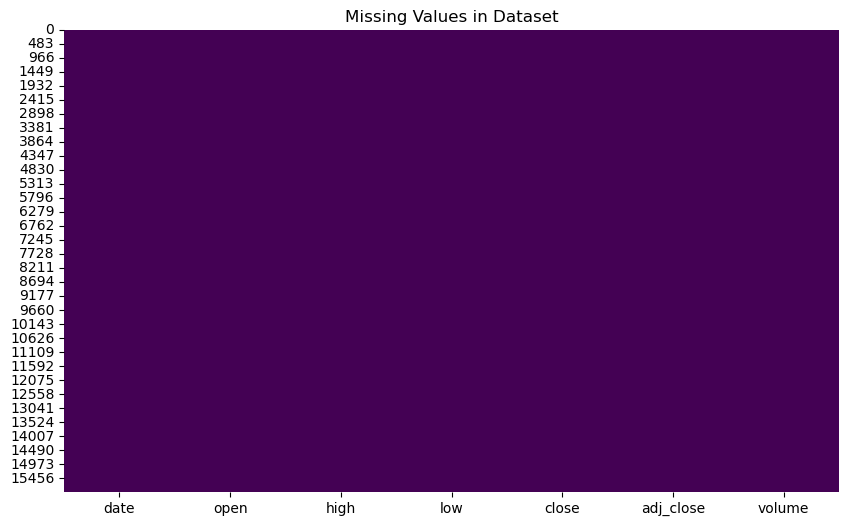

In [13]:
# Heatmap of missing values
plt.figure(figsize=(10,6))
sns.heatmap(cola_stock.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Dataset')
plt.show()

This shows that there are no missing values in the dataframe

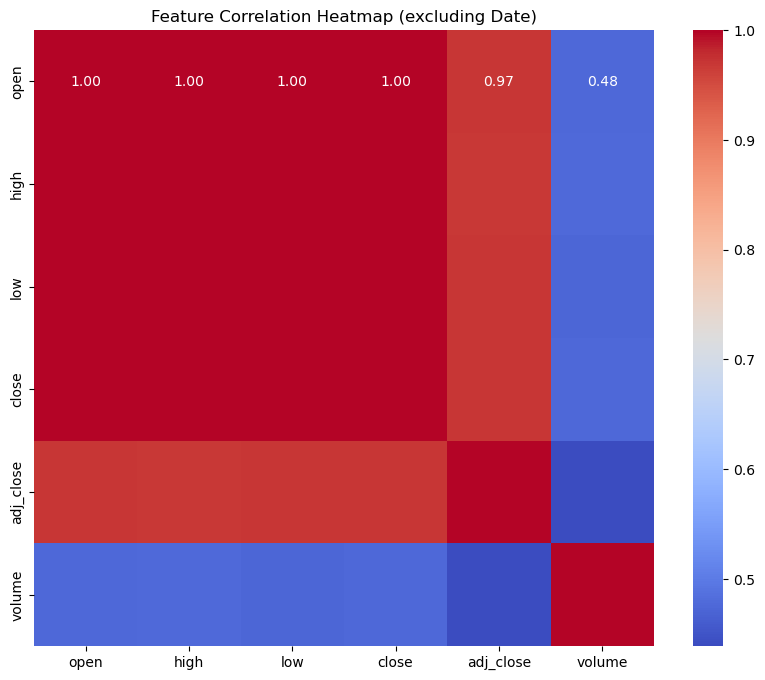

In [14]:
#for correlation matrix I will be dropping datetime since its not a float
corr_matrix = cola_stock.drop(columns=['date']).corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap (excluding Date)')
plt.show()

In [15]:
#extracting the date to seperate collumns
cola_stock['year'] = cola_stock['date'].dt.year
cola_stock['month'] = cola_stock['date'].dt.month
cola_stock['day'] = cola_stock['date'].dt.day
cola_stock

,date,open,high,low,close,adj_close,volume,year,month,day
0,1962-01-02,0.263021,0.270182,0.263021,0.263021,0.046041,806400,1962,1,2
1,1962-01-03,0.259115,0.259115,0.253255,0.257161,0.045016,1574400,1962,1,3
2,1962-01-04,0.257813,0.261068,0.257813,0.259115,0.045358,844800,1962,1,4
3,1962-01-05,0.259115,0.262370,0.252604,0.253255,0.044332,1420800,1962,1,5
4,1962-01-08,0.251302,0.251302,0.245768,0.250651,0.043876,2035200,1962,1,8
...,...,...,...,...,...,...,...,...,...,...
15925,2025-04-10,70.190002,71.209999,68.980003,70.760002,70.760002,22450200,2025,4,10
15926,2025-04-11,70.910004,71.849998,70.540001,71.430000,71.430000,19988200,2025,4,11
15927,2025-04-14,71.300003,72.660004,70.930000,72.449997,72.449997,13930200,2025,4,14
15928,2025-04-15,72.620003,72.629997,71.720001,71.860001,71.860001,14965500,2025,4,15


In [16]:
cola_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15930 entries, 0 to 15929
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       15930 non-null  datetime64[ns]
 1   open       15930 non-null  float64       
 2   high       15930 non-null  float64       
 3   low        15930 non-null  float64       
 4   close      15930 non-null  float64       
 5   adj_close  15930 non-null  float64       
 6   volume     15930 non-null  int64         
 7   year       15930 non-null  int32         
 8   month      15930 non-null  int32         
 9   day        15930 non-null  int32         
dtypes: datetime64[ns](1), float64(5), int32(3), int64(1)
memory usage: 1.0 MB


In [17]:
cola_stock.describe()

,date,open,high,low,close,adj_close,volume,year,month,day
count,15930,15930.000000,15930.000000,15930.000000,15930.000000,15930.000000,1.593000e+04,15930.000000,15930.000000,15930.000000
mean,1993-08-31 02:24:48.813559296,18.476707,18.625024,18.325447,18.481559,12.860345,9.340502e+06,1993.166416,6.508788,15.734777
min,1962-01-02 00:00:00,0.192708,0.193359,0.182292,0.192057,0.034086,7.680000e+04,1962.000000,1.000000,1.000000
25%,1977-11-23 12:00:00,0.888021,0.895833,0.880208,0.888021,0.223946,3.120000e+06,1977.000000,4.000000,8.000000
50%,1993-08-25 12:00:00,10.531250,10.640625,10.468750,10.531250,4.828978,8.094800e+06,1993.000000,7.000000,16.000000
75%,2009-06-17 18:00:00,32.000000,32.375000,31.625000,32.000000,17.417218,1.330348e+07,2009.000000,10.000000,23.000000
max,2025-04-16 00:00:00,73.300003,73.949997,72.320000,73.180000,73.180000,1.241690e+08,2025.000000,12.000000,31.000000
std,NaN,19.461582,19.601645,19.317982,19.464715,16.691945,7.958782e+06,18.247033,3.437169,8.742723


In [18]:
#checking for daily returns
cola_stock['returns'] = cola_stock['adj_close'].pct_change()
cola_stock

,date,open,high,low,close,adj_close,volume,year,month,day,returns
0,1962-01-02,0.263021,0.270182,0.263021,0.263021,0.046041,806400,1962,1,2,NaN
1,1962-01-03,0.259115,0.259115,0.253255,0.257161,0.045016,1574400,1962,1,3,-0.022280
2,1962-01-04,0.257813,0.261068,0.257813,0.259115,0.045358,844800,1962,1,4,0.007598
3,1962-01-05,0.259115,0.262370,0.252604,0.253255,0.044332,1420800,1962,1,5,-0.022615
4,1962-01-08,0.251302,0.251302,0.245768,0.250651,0.043876,2035200,1962,1,8,-0.010283
...,...,...,...,...,...,...,...,...,...,...,...
15925,2025-04-10,70.190002,71.209999,68.980003,70.760002,70.760002,22450200,2025,4,10,0.011580
15926,2025-04-11,70.910004,71.849998,70.540001,71.430000,71.430000,19988200,2025,4,11,0.009469
15927,2025-04-14,71.300003,72.660004,70.930000,72.449997,72.449997,13930200,2025,4,14,0.014280
15928,2025-04-15,72.620003,72.629997,71.720001,71.860001,71.860001,14965500,2025,4,15,-0.008143


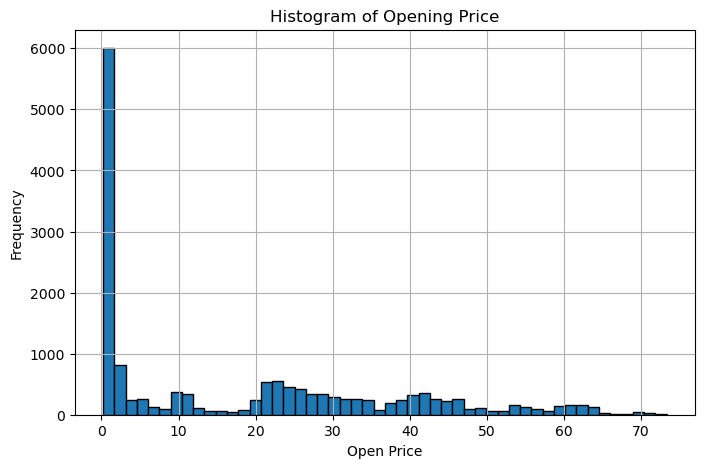

In [19]:
cola_stock['open'].hist(bins=50, figsize=(8,5), edgecolor = 'black')
plt.title("Histogram of Opening Price")
plt.xlabel("Open Price")
plt.ylabel("Frequency")
plt.grid(True)
plt.show() 

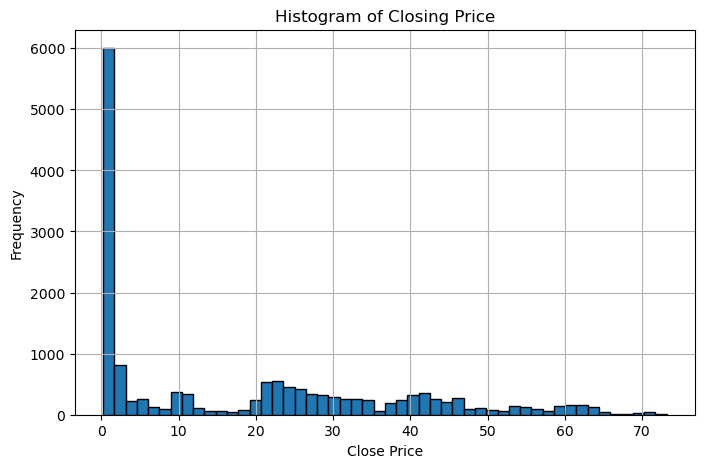

In [20]:
cola_stock['close'].hist(bins=50, figsize=(8,5), edgecolor = 'black')
plt.title("Histogram of Closing Price")
plt.xlabel("Close Price")
plt.ylabel("Frequency")
plt.grid(True)
plt.show() 

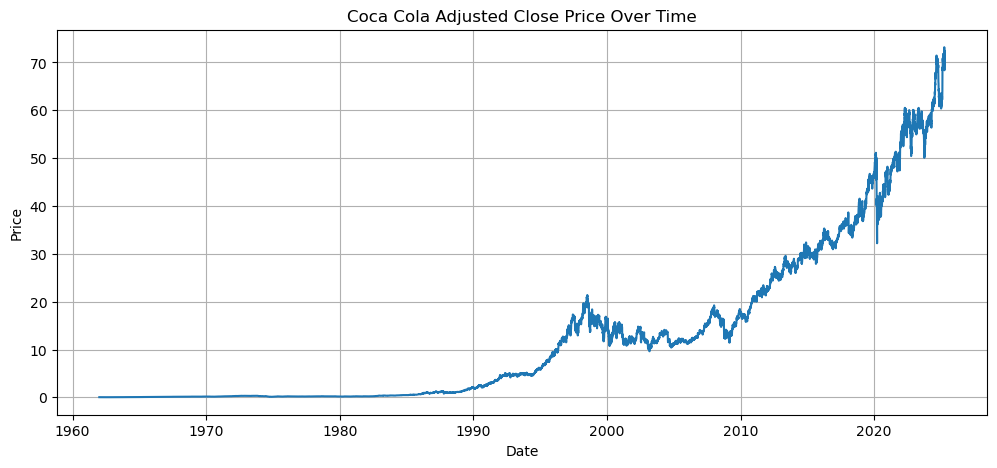

In [21]:
# Line plot of adjusted close
plt.figure(figsize=(12, 5))
plt.plot(cola_stock['date'], cola_stock['adj_close'])
plt.title("Coca Cola Adjusted Close Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.show()

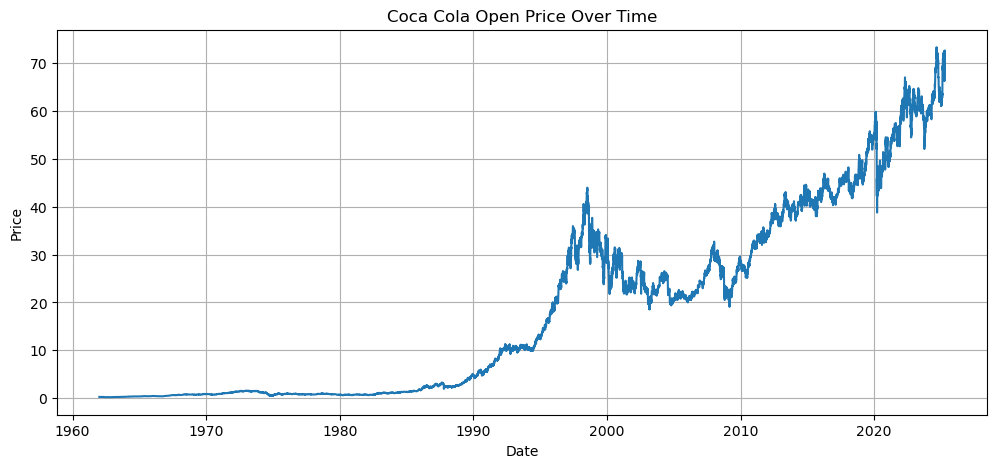

In [22]:
# Line plot of open price
plt.figure(figsize=(12, 5))
plt.plot(cola_stock['date'], cola_stock['open'])
plt.title("Coca Cola Open Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.show()

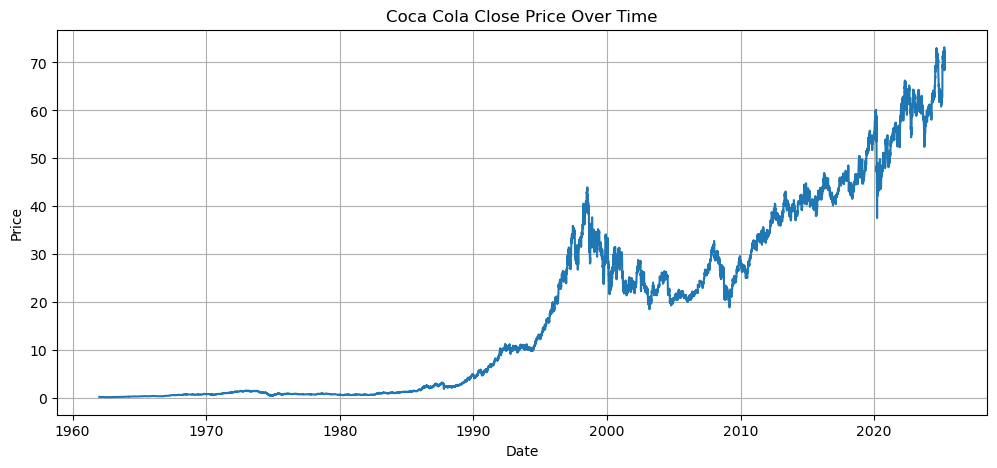

In [23]:
# Line plot of open price
plt.figure(figsize=(12, 5))
plt.plot(cola_stock['date'], cola_stock['close'])
plt.title("Coca Cola Close Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.show()

From the plot above we can see that the close price of coca cola stock price or KO was stagnant in the 1960s it atart to rise in the year 1990 where there is a huge spike in close price by the year 2000 the price have a slight decrease where it fluctuates until 2010 where it once again spikes up with slight fluctuations and reach its peak in 2025

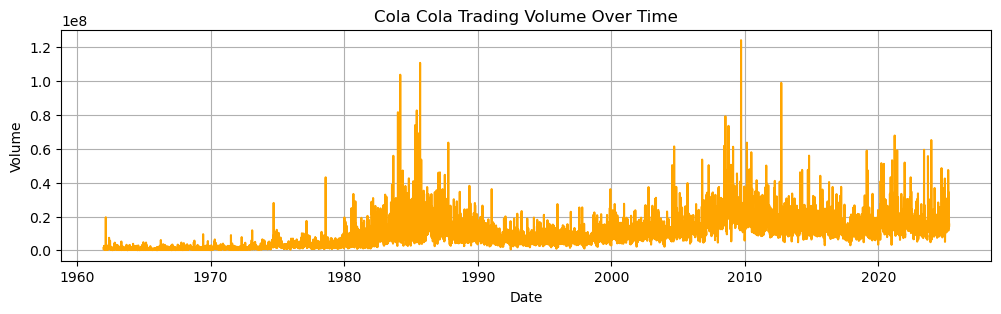

In [24]:
# Volume over time
plt.figure(figsize=(12, 3))
plt.plot(cola_stock['date'], cola_stock['volume'], color='orange')
plt.title("Cola Cola Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.grid(True)
plt.show()


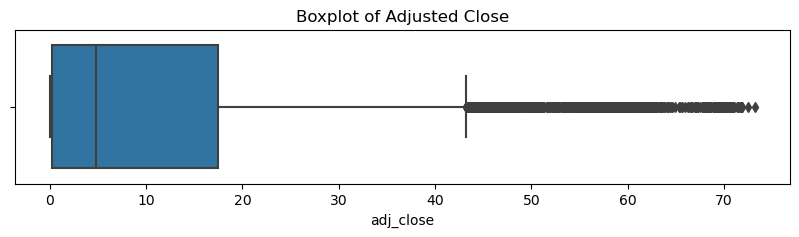

In [25]:
plt.figure(figsize=(10, 2))
sns.boxplot(x=cola_stock['adj_close'])
plt.title("Boxplot of Adjusted Close")
plt.show()

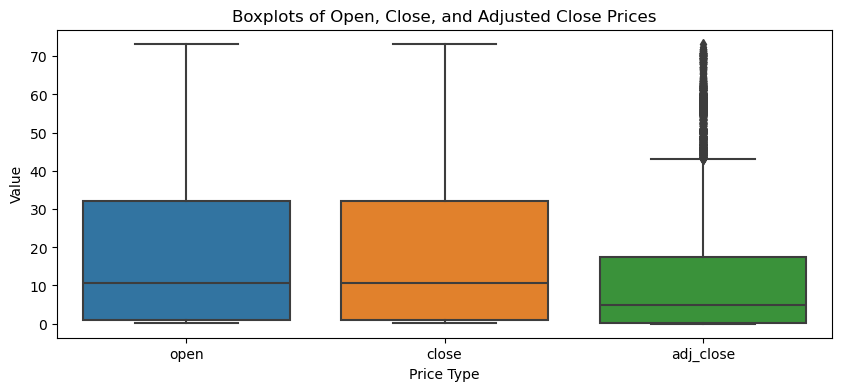

In [26]:

# Select the columns you want to plot
columns_to_plot = ['open', 'close', 'adj_close']
cola_subset = cola_stock[columns_to_plot]

# Reshape the DataFrame to long format
melted = pd.melt(cola_subset, var_name='Price Type', value_name='Value')

# Plot
plt.figure(figsize=(10, 4))
sns.boxplot(x='Price Type', y='Value', data=melted)
plt.title("Boxplots of Open, Close, and Adjusted Close Prices")
plt.show()

In [27]:
cola_stock.dtypes

date         datetime64[ns]
open                float64
high                float64
low                 float64
close               float64
adj_close           float64
volume                int64
year                  int32
month                 int32
day                   int32
returns             float64
dtype: object

<Axes: title={'center': 'Drawdowns over time'}>

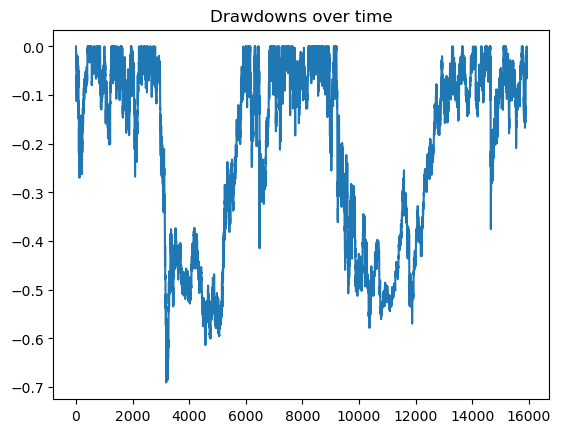

In [28]:
cola_stock['Cumulative_Max'] = cola_stock['close'].cummax()
cola_stock['Drawdown'] = (cola_stock['close'] - cola_stock['Cumulative_Max']) / cola_stock['Cumulative_Max']

cola_stock['Drawdown'].plot(title='Drawdowns over time')

In [29]:
cola_stock_1 = cola_stock
sp500_stock_1 = sp500_stock

TypeError: 'NoneType' object is not subscriptable

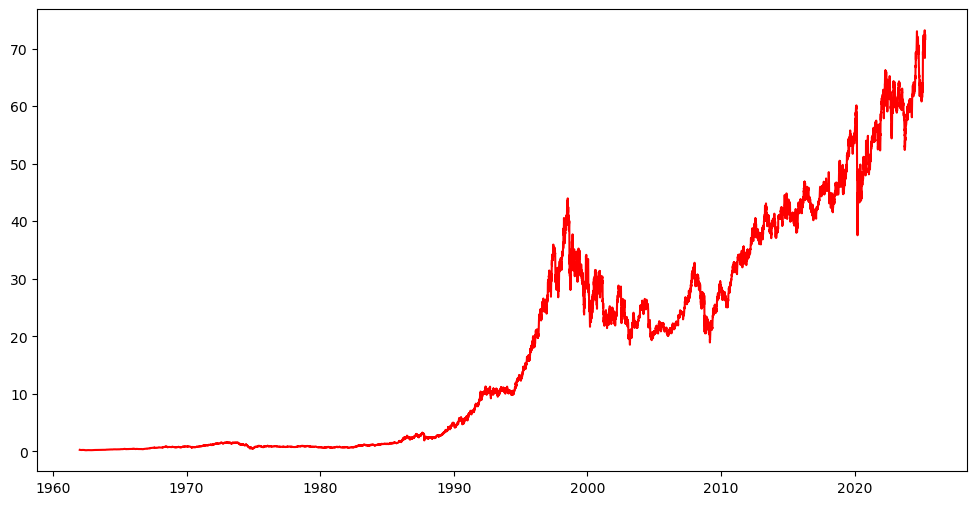

In [30]:

plt.figure(figsize=(12,6))
plt.plot(cola_stock_1['date'], cola_stock_1['close'], label='Coca-Cola', color='red')
plt.plot(sp500_stock_1['date'], sp500_stock_1['norm_close'], label='S&P 500', color='blue')
plt.title('Normalized Close Price: Coca-Cola vs. S&P 500')
plt.xlabel('Date')
plt.ylabel('Normalized Price (Base 100)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Feature Engineering

In [31]:
#Initial features before feature engineering
cola_stock

,date,open,high,low,close,adj_close,volume,year,month,day,returns,Cumulative_Max,Drawdown
0,1962-01-02,0.263021,0.270182,0.263021,0.263021,0.046041,806400,1962,1,2,NaN,0.263021,0.000000
1,1962-01-03,0.259115,0.259115,0.253255,0.257161,0.045016,1574400,1962,1,3,-0.022280,0.263021,-0.022280
2,1962-01-04,0.257813,0.261068,0.257813,0.259115,0.045358,844800,1962,1,4,0.007598,0.263021,-0.014850
3,1962-01-05,0.259115,0.262370,0.252604,0.253255,0.044332,1420800,1962,1,5,-0.022615,0.263021,-0.037130
4,1962-01-08,0.251302,0.251302,0.245768,0.250651,0.043876,2035200,1962,1,8,-0.010283,0.263021,-0.047030
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15925,2025-04-10,70.190002,71.209999,68.980003,70.760002,70.760002,22450200,2025,4,10,0.011580,73.180000,-0.033069
15926,2025-04-11,70.910004,71.849998,70.540001,71.430000,71.430000,19988200,2025,4,11,0.009469,73.180000,-0.023914
15927,2025-04-14,71.300003,72.660004,70.930000,72.449997,72.449997,13930200,2025,4,14,0.014280,73.180000,-0.009975
15928,2025-04-15,72.620003,72.629997,71.720001,71.860001,71.860001,14965500,2025,4,15,-0.008143,73.180000,-0.018038


In [32]:
cola_stock['momentum'] = cola_stock_1['close'] - cola_stock['close'].shift(20)
#To handle NaN we will replace first 10 days result with 0 
cola_stock['momentum'].iloc[:10] = 0

#Price Change
cola_stock['price_change'] = cola_stock['close'] - cola_stock['open']

/var/folders/2k/9trrdq5j5956nnt1tjxbq3900000gn/T/ipykernel_27864/3785356235.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cola_stock['momentum'].iloc[:10] = 0


In [33]:
#RSI
cola_stock['rsi'] = RSIIndicator(close=cola_stock['close']).rsi()

#MACD
macd = MACD(close=cola_stock['close'])
cola_stock['macd'] = macd.macd()
cola_stock['macd_signal'] = macd.macd_signal()
cola_stock['macd_diff'] = macd.macd_diff()

#Bolinnger Bands
bb = BollingerBands(close=cola_stock['close'])
cola_stock['bb_high'] = bb.bollinger_hband()
cola_stock['bb_low'] = bb.bollinger_lband()
cola_stock['bb_width'] = cola_stock['bb_high'] - cola_stock['bb_low']

In [50]:
cola_stock['rolling_mean'] = cola_stock['adj_close'].rolling(window=10).mean()

cola_stock['rolling_std'] = cola_stock['adj_close'].rolling(window=10).std()

#Z scores
cola_stock['z_scores'] = (cola_stock['close']-cola_stock['rolling_mean']) / cola_stock['rolling_std']

In [56]:
cola_stock['z_scores']

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
           ...   
15925    0.119227
15926    0.486139
15927    1.045861
15928    0.679728
15929    0.540075
Name: z_scores, Length: 15930, dtype: float64

In [52]:
#Features after feature engineering
cola_stock

,date,open,high,low,close,adj_close,volume,year,month,day,...,rsi,macd,macd_signal,macd_diff,bb_high,bb_low,bb_width,rolling_mean,rolling_std,z_scores
0,1962-01-02,0.263021,0.270182,0.263021,0.263021,0.046041,806400,1962,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1962-01-03,0.259115,0.259115,0.253255,0.257161,0.045016,1574400,1962,1,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1962-01-04,0.257813,0.261068,0.257813,0.259115,0.045358,844800,1962,1,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1962-01-05,0.259115,0.262370,0.252604,0.253255,0.044332,1420800,1962,1,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1962-01-08,0.251302,0.251302,0.245768,0.250651,0.043876,2035200,1962,1,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15925,2025-04-10,70.190002,71.209999,68.980003,70.760002,70.760002,22450200,2025,4,10,...,53.628481,0.257689,0.430704,-0.173015,72.497756,67.566244,4.931512,70.580001,1.509739,0.119227
15926,2025-04-11,70.910004,71.849998,70.540001,71.430000,71.430000,19988200,2025,4,11,...,56.083732,0.337937,0.412151,-0.074213,72.648943,67.642056,5.006887,70.686001,1.530427,0.486139
15927,2025-04-14,71.300003,72.660004,70.930000,72.449997,72.449997,13930200,2025,4,14,...,59.591471,0.478326,0.425386,0.052940,72.959211,67.564788,5.394424,70.769000,1.607285,1.045861
15928,2025-04-15,72.620003,72.629997,71.720001,71.860001,71.860001,14965500,2025,4,15,...,56.767025,0.535801,0.447469,0.088332,73.137106,67.634894,5.502212,70.768000,1.606527,0.679728


# Machine Learning

## Price Prediction

In [53]:
cola_stock_no_na = cola_stock.dropna()

In [54]:
cola_stock_no_na

,date,open,high,low,close,adj_close,volume,year,month,day,...,rsi,macd,macd_signal,macd_diff,bb_high,bb_low,bb_width,rolling_mean,rolling_std,z_scores
33,1962-02-16,0.239583,0.244141,0.239583,0.239583,0.041939,1190400,1962,2,16,...,39.214981,-0.002359,-0.002426,0.000067,0.251226,0.233051,0.018175,0.042736,0.000529,371.999710
34,1962-02-19,0.241536,0.243490,0.241536,0.243490,0.042623,345600,1962,2,19,...,46.796584,-0.002141,-0.002369,0.000228,0.250842,0.233110,0.017731,0.042668,0.000490,409.776821
35,1962-02-20,0.243490,0.244141,0.241536,0.242188,0.042395,460800,1962,2,20,...,44.791604,-0.002049,-0.002305,0.000256,0.250872,0.233145,0.017728,0.042634,0.000497,401.797036
36,1962-02-21,0.242188,0.244141,0.240885,0.240885,0.042167,691200,1962,2,21,...,42.814587,-0.002058,-0.002255,0.000198,0.250875,0.233338,0.017537,0.042554,0.000502,395.303518
37,1962-02-23,0.240885,0.244141,0.238281,0.238281,0.041711,1036800,1962,2,23,...,39.100298,-0.002249,-0.002254,0.000005,0.250805,0.233538,0.017267,0.042417,0.000529,370.524563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15925,2025-04-10,70.190002,71.209999,68.980003,70.760002,70.760002,22450200,2025,4,10,...,53.628481,0.257689,0.430704,-0.173015,72.497756,67.566244,4.931512,70.580001,1.509739,0.119227
15926,2025-04-11,70.910004,71.849998,70.540001,71.430000,71.430000,19988200,2025,4,11,...,56.083732,0.337937,0.412151,-0.074213,72.648943,67.642056,5.006887,70.686001,1.530427,0.486139
15927,2025-04-14,71.300003,72.660004,70.930000,72.449997,72.449997,13930200,2025,4,14,...,59.591471,0.478326,0.425386,0.052940,72.959211,67.564788,5.394424,70.769000,1.607285,1.045861
15928,2025-04-15,72.620003,72.629997,71.720001,71.860001,71.860001,14965500,2025,4,15,...,56.767025,0.535801,0.447469,0.088332,73.137106,67.634894,5.502212,70.768000,1.606527,0.679728


In [57]:
# Selecting features and defining target for machine learning
features = ['open','high','low','volume','price_change','adj_close','returns','Cumulative_Max','rolling_mean','z_scores','macd','momentum']
target = ['close']

In [196]:
# Splitting the dataframe to train and test dataframe
X = cola_stock_no_na[features]
y= cola_stock_no_na[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [197]:
#Applying model
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [198]:
y_pred = model.predict(X_test)

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.4f}")

RMSE: 0.1227


In [238]:

xgb_model = XGBRegressor(objective='reg:squarederror', random_state = 42)

# Grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7,9],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.9, 1.0],
    }


In [239]:
#running grid search 

grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error',
    cv=3,
    verbose=1,
    n_jobs=1
)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best RMSE:", -grid_search.best_score_)

best_model = grid_search.best_estimator_


Fitting 3 folds for each of 324 candidates, totalling 972 fits
Best parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.7}
Best RMSE: 0.1301861442869617


In [240]:
y_pred = best_model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared = False)
print(f"Final RMSE: {rmse:.4f}")

Final RMSE: 0.1094


In [241]:
#computing metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}")

MAE: 0.06, MSE: 0.01, RMSE: 0.11, R²: 1.00


In [242]:
y_train_pred = best_model.predict(X_train)

rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_test = mean_squared_error(y_test, y_pred, squared=False)

print("Train RMSE:", rmse_train)
print("Test RMSE:", rmse_test)

Train RMSE: 0.05963371252663963
Test RMSE: 0.10937429139433688


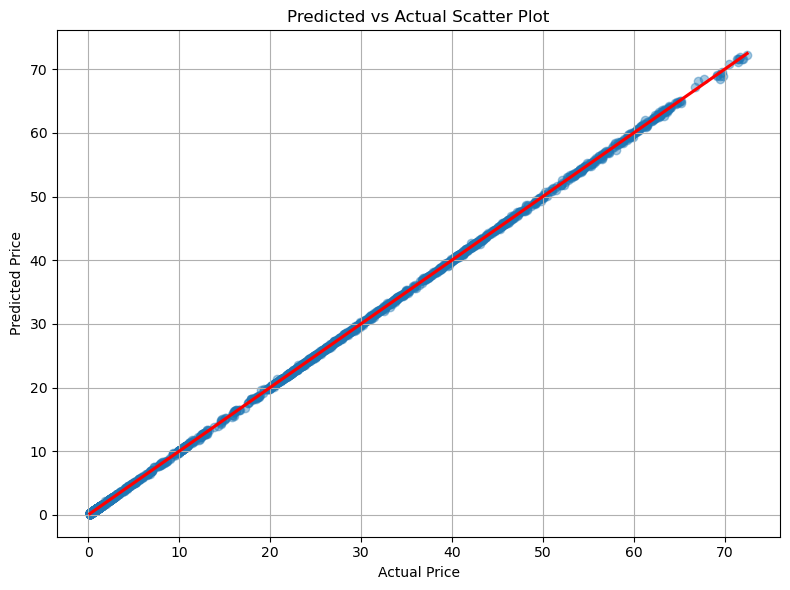

In [243]:

plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.4}, line_kws={"color":"red"})
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Predicted vs Actual Scatter Plot')
plt.grid(True)
plt.tight_layout()
plt.show()


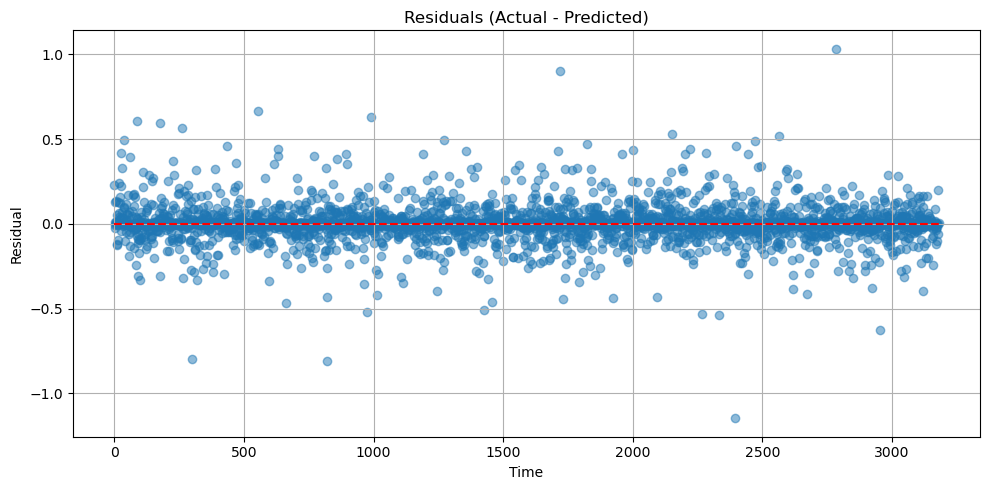

In [244]:

y_test_2 = np.ravel(y_test)
y_pred_2 = np.ravel(y_pred)
residuals = y_test_2 - y_pred_2

# Plotting the residuals
plt.figure(figsize=(10, 5))
plt.scatter(range(len(residuals)), residuals, alpha=0.5)
plt.hlines(0, xmin=0, xmax=len(residuals), colors='red', linestyles='--')
plt.title('Residuals (Actual - Predicted)')
plt.xlabel('Time')
plt.ylabel('Residual')
plt.grid(True)
plt.tight_layout()
plt.show()


In [251]:
y_pred_series = pd.Series(y_pred_2, index=y_test.index, name='predicted')
y_pred_series


15301    55.640976
13593    42.828892
5023      0.757292
5351      1.156588
8792     24.897049
           ...    
6694      2.427410
1698      0.758754
9829     28.373644
9924     23.500269
2615      1.381569
Name: predicted, Length: 3180, dtype: float32

In [252]:
cola_stock_no_na.loc[y_test.index, 'actual'] = y_test
cola_stock_no_na.loc[y_test.index, 'predicted'] = y_pred_series

/var/folders/2k/9trrdq5j5956nnt1tjxbq3900000gn/T/ipykernel_42117/2382294338.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cola_stock_no_na.loc[y_test.index, 'actual'] = y_test
/var/folders/2k/9trrdq5j5956nnt1tjxbq3900000gn/T/ipykernel_42117/2382294338.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cola_stock_no_na.loc[y_test.index, 'predicted'] = y_pred_series


In [58]:
cola_stock_with_prediction = cola_stock_no_na

In [59]:
cola_stock_with_prediction[['close', 'predicted']].plot(figsize=(12,6), title='Actual vs Predicted Prices')
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.show()

KeyError: "['predicted'] not in index"

# 2. Trend Classification

After finishing the price prediction now I am going to make trend classification using SVM

In [60]:
#first I will assign new dataframe so we will not use or alter the no NA dataframe so if we want to roll back the data we still can revert back to the old one 
cola_stock_classification = cola_stock_no_na

In [61]:
cola_stock_classification['price_diff'] = cola_stock_classification['close'].diff().shift(-1)
cola_stock_classification['trend'] = cola_stock_classification['price_diff'].apply(lambda x: 1 if x > 0 else (-1 if x < 0 else 0))

/var/folders/2k/9trrdq5j5956nnt1tjxbq3900000gn/T/ipykernel_27864/3167041140.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cola_stock_classification['price_diff'] = cola_stock_classification['close'].diff().shift(-1)
/var/folders/2k/9trrdq5j5956nnt1tjxbq3900000gn/T/ipykernel_27864/3167041140.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cola_stock_classification['trend'] = cola_stock_classification['price_diff'].apply(lambda x: 1 if x > 0 else (-1 if x < 0 else 0))


In [62]:
cola_stock_classification

,date,open,high,low,close,adj_close,volume,year,month,day,...,macd_signal,macd_diff,bb_high,bb_low,bb_width,rolling_mean,rolling_std,z_scores,price_diff,trend
33,1962-02-16,0.239583,0.244141,0.239583,0.239583,0.041939,1190400,1962,2,16,...,-0.002426,0.000067,0.251226,0.233051,0.018175,0.042736,0.000529,371.999710,0.003907,1
34,1962-02-19,0.241536,0.243490,0.241536,0.243490,0.042623,345600,1962,2,19,...,-0.002369,0.000228,0.250842,0.233110,0.017731,0.042668,0.000490,409.776821,-0.001302,-1
35,1962-02-20,0.243490,0.244141,0.241536,0.242188,0.042395,460800,1962,2,20,...,-0.002305,0.000256,0.250872,0.233145,0.017728,0.042634,0.000497,401.797036,-0.001303,-1
36,1962-02-21,0.242188,0.244141,0.240885,0.240885,0.042167,691200,1962,2,21,...,-0.002255,0.000198,0.250875,0.233338,0.017537,0.042554,0.000502,395.303518,-0.002604,-1
37,1962-02-23,0.240885,0.244141,0.238281,0.238281,0.041711,1036800,1962,2,23,...,-0.002254,0.000005,0.250805,0.233538,0.017267,0.042417,0.000529,370.524563,0.003907,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15925,2025-04-10,70.190002,71.209999,68.980003,70.760002,70.760002,22450200,2025,4,10,...,0.430704,-0.173015,72.497756,67.566244,4.931512,70.580001,1.509739,0.119227,0.669998,1
15926,2025-04-11,70.910004,71.849998,70.540001,71.430000,71.430000,19988200,2025,4,11,...,0.412151,-0.074213,72.648943,67.642056,5.006887,70.686001,1.530427,0.486139,1.019997,1
15927,2025-04-14,71.300003,72.660004,70.930000,72.449997,72.449997,13930200,2025,4,14,...,0.425386,0.052940,72.959211,67.564788,5.394424,70.769000,1.607285,1.045861,-0.589996,-1
15928,2025-04-15,72.620003,72.629997,71.720001,71.860001,71.860001,14965500,2025,4,15,...,0.447469,0.088332,73.137106,67.634894,5.502212,70.768000,1.606527,0.679728,-0.180000,-1


In [63]:
# Preparring features and labels for classification

cola_stock_classification = cola_stock_classification.dropna(subset=['trend'])
cola_stock_classification.dropna(inplace=True)

X = cola_stock_classification[features]
y = cola_stock_classification['trend']


In [64]:
#splitting the data into X and Y train and test 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)



In [65]:
#training the SVM classifier

svm_model = SVC(kernel='rbf')
svm_model.fit(X_train,y_train)

SVC()

In [66]:
print("Sample values from y_pred:", y_pred[:10])

NameError: name 'y_pred' is not defined

In [ ]:
y_pred = svm_model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[   7    0 1484]
 [   0    0   37]
 [  10    0 1641]]
              precision    recall  f1-score   support

          -1       0.41      0.00      0.01      1491
           0       0.00      0.00      0.00        37
           1       0.52      0.99      0.68      1651

    accuracy                           0.52      3179
   macro avg       0.31      0.33      0.23      3179
weighted avg       0.46      0.52      0.36      3179



/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Since the result is not satisfactory I will do another training but first I will rescale the features first using standard scaler

In [67]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Defining gridsearch 

param_grid_svm = {
    'C': [0.1,1,10,100],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'kernel': ['rbf', 'linear', 'poly'],
}

svm_model = SVC(class_weight='balanced')

svm_grid_search = GridSearchCV(
    estimator = svm_model,
    param_grid = param_grid_svm,
    cv = 5,
    scoring = 'f1_macro',
    n_jobs = 1,
    verbose = 1
)

svm_grid_search.fit(X_train_scaled,y_train)

print("Best parameters:", svm_grid_search.best_params_)
svm_best_model = svm_grid_search.best_estimator_

Fitting 5 folds for each of 72 candidates, totalling 360 fits


In [ ]:
svm_y_pred = svm_best_model.predict(X_test_scaled)
print(confusion_matrix(y_test, svm_y_pred))
print(classification_report(y_test, svm_y_pred))

In [311]:
cola_stock_no_na.to_csv("/Users/julius/Personal/Personal_Project/Coca_cola_Project/Analysis_of_Coca_Cola_Stock_Market/Dataset/clean_dataset/cola_stocks_features.csv", index=False)